### Carga de las librerías

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

### Carga de los datos y análisis preliminar

In [66]:
df_DB = pd.DataFrame(pd.read_csv(r"../data/australian_users_items.csv"))
df_DB.sample(5)

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
1073761,NaN,NaN,NaN,NaN,2430,The Ship Tutorial,0,0
3334727,NaN,NaN,NaN,NaN,57300,Amnesia: The Dark Descent,1617,0
2973743,NaN,NaN,NaN,NaN,243470,Watch_Dogs,49,0
3464583,NaN,NaN,NaN,NaN,291550,Brawlhalla,89,0
684539,NaN,NaN,NaN,NaN,91200,Anomaly Warzone Earth,0,0


In [67]:
df_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       float64
 2   steam_id          float64
 3   user_url          object 
 4   item_id           int64  
 5   item_name         object 
 6   playtime_forever  int64  
 7   playtime_2weeks   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 314.5+ MB


In [68]:
df_DB[df_DB["user_id"].notna()].sample(5)

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
64290,76561198068785086,72.0,7.656120e+16,http://steamcommunity.com/profiles/76561198068...,204360,Castle Crashers,170,0
33819,agentmccoy,0.0,7.656120e+16,http://steamcommunity.com/id/agentmccoy,219540,Arma 2: Operation Arrowhead Beta (Obsolete),0,0
34171,76561198087546697,48.0,7.656120e+16,http://steamcommunity.com/profiles/76561198087...,359320,Elite Dangerous,2522,0
60090,knxd12345,0.0,7.656120e+16,http://steamcommunity.com/id/knxd12345,4000,Garry's Mod,45446,0
51326,76561198044048582,1.0,7.656120e+16,http://steamcommunity.com/profiles/76561198044...,220240,Far Cry® 3,2316,0


In [69]:
df_DB[df_DB["user_id"].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 88310 entries, 0 to 88309
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           88310 non-null  object 
 1   items_count       88310 non-null  float64
 2   steam_id          88310 non-null  float64
 3   user_url          88310 non-null  object 
 4   item_id           88310 non-null  int64  
 5   item_name         88310 non-null  object 
 6   playtime_forever  88310 non-null  int64  
 7   playtime_2weeks   88310 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 6.1+ MB


In [70]:
df_DB[df_DB["user_id"].isna()].sample(5)

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
1951885,NaN,NaN,NaN,NaN,272890,Vertiginous Golf,0,0
3845308,NaN,NaN,NaN,NaN,322330,Don't Starve Together,0,0
2690348,NaN,NaN,NaN,NaN,269390,Dethroned!,2,0
891592,NaN,NaN,NaN,NaN,385730,WWE 2K16,77,0
1949622,NaN,NaN,NaN,NaN,24010,Train Simulator,34,0


In [71]:
df_DB[df_DB["user_id"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5064899 entries, 88310 to 5153208
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       float64
 2   steam_id          float64
 3   user_url          object 
 4   item_id           int64  
 5   item_name         object 
 6   playtime_forever  int64  
 7   playtime_2weeks   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 347.8+ MB


In [72]:
df_DB[df_DB["user_id"].isna()].isna().sum()

user_id             5064899
items_count         5064899
steam_id            5064899
user_url            5064899
item_id                   0
item_name                 0
playtime_forever          0
playtime_2weeks           0
dtype: int64

Propongo una limpieza primaria en la que inicialmente, aún antes del análisis de valores faltantes se eliminen filas y columnas que por su elevada incidencia (sobre 5.153.209 registros que tiene el dataset, 5.064.899 son nulos), determinada por registros sin datos útiles para este análisis.

Asimismo, ya podemos determinar algunas columas que sabemos no son de utilidad para las consultas propuestas, incluyendo los sistemas de recomendación.

Las filas en las que el "campo user_id" tienen el valor NaN, coindiden con las que tienen valores nulos de las columnas "items_count", "steam_id" y "user_url", por lo que si bien podemos inferir que podrían ser usuarios que juegan como anónimos (por ejemplo en línea), son datos que para este trabajo carecen de significado, por ello se decide <b><i>eliminar los registros con valores NaN en el campo "<u>user_id</u>"</i></b>.

Sobre la columna "items_count", no conocemos qué datos contiene, ya que no se encuentra en el diccionario de datos y no se puede inferir su contenido por el nombre de la columna ni por los datos que contiene. Se decide <b><i>eliminar la columna "<u>items_count</u>"</i></b>.

Asimismo no nos son de utilidad  las columnas "steam_id", "user_url" "item_name" y "playtime_2weeks". Se decide <b><i>eliminar las columnas "<u>steam_id</u>", "<u>user_url</u>", "<u>item_name</u>" y "<u>playtime_2weeks</u>"</i></b>.


Sobre la información subyacente a las eliminaciones planteadas podemos analizar que nuestros datos, vemos que sólo quedan los ids para vincular las horas jugadas con items y con los reviews de los usuarios.

### Poceso de transformación derivado del análisis preliminar

In [73]:
# Eliminar los registros con valores NaN en el campo user_id
filtro = df_DB[df_DB.user_id.isnull()].index
df_DB.drop(filtro, inplace=True)
df_DB.reset_index(inplace=True)

In [74]:
# Eliminar las columnas items_count, steam_id, user_url, item_name y playtime_2weeks

# Creo una variable con los nombres de la columas a eliminar
columnasEliminar = ["index","items_count", "steam_id", "user_url", "item_name", "playtime_2weeks"]

# Elimino las columnas
df_DB.drop(columnasEliminar, axis=1, inplace=True)

### Análisis de valores faltantes

In [75]:
df_DB.isna().sum()

user_id             0
item_id             0
playtime_forever    0
dtype: int64

Text(0.5, 1.0, 'Valores Nulos')

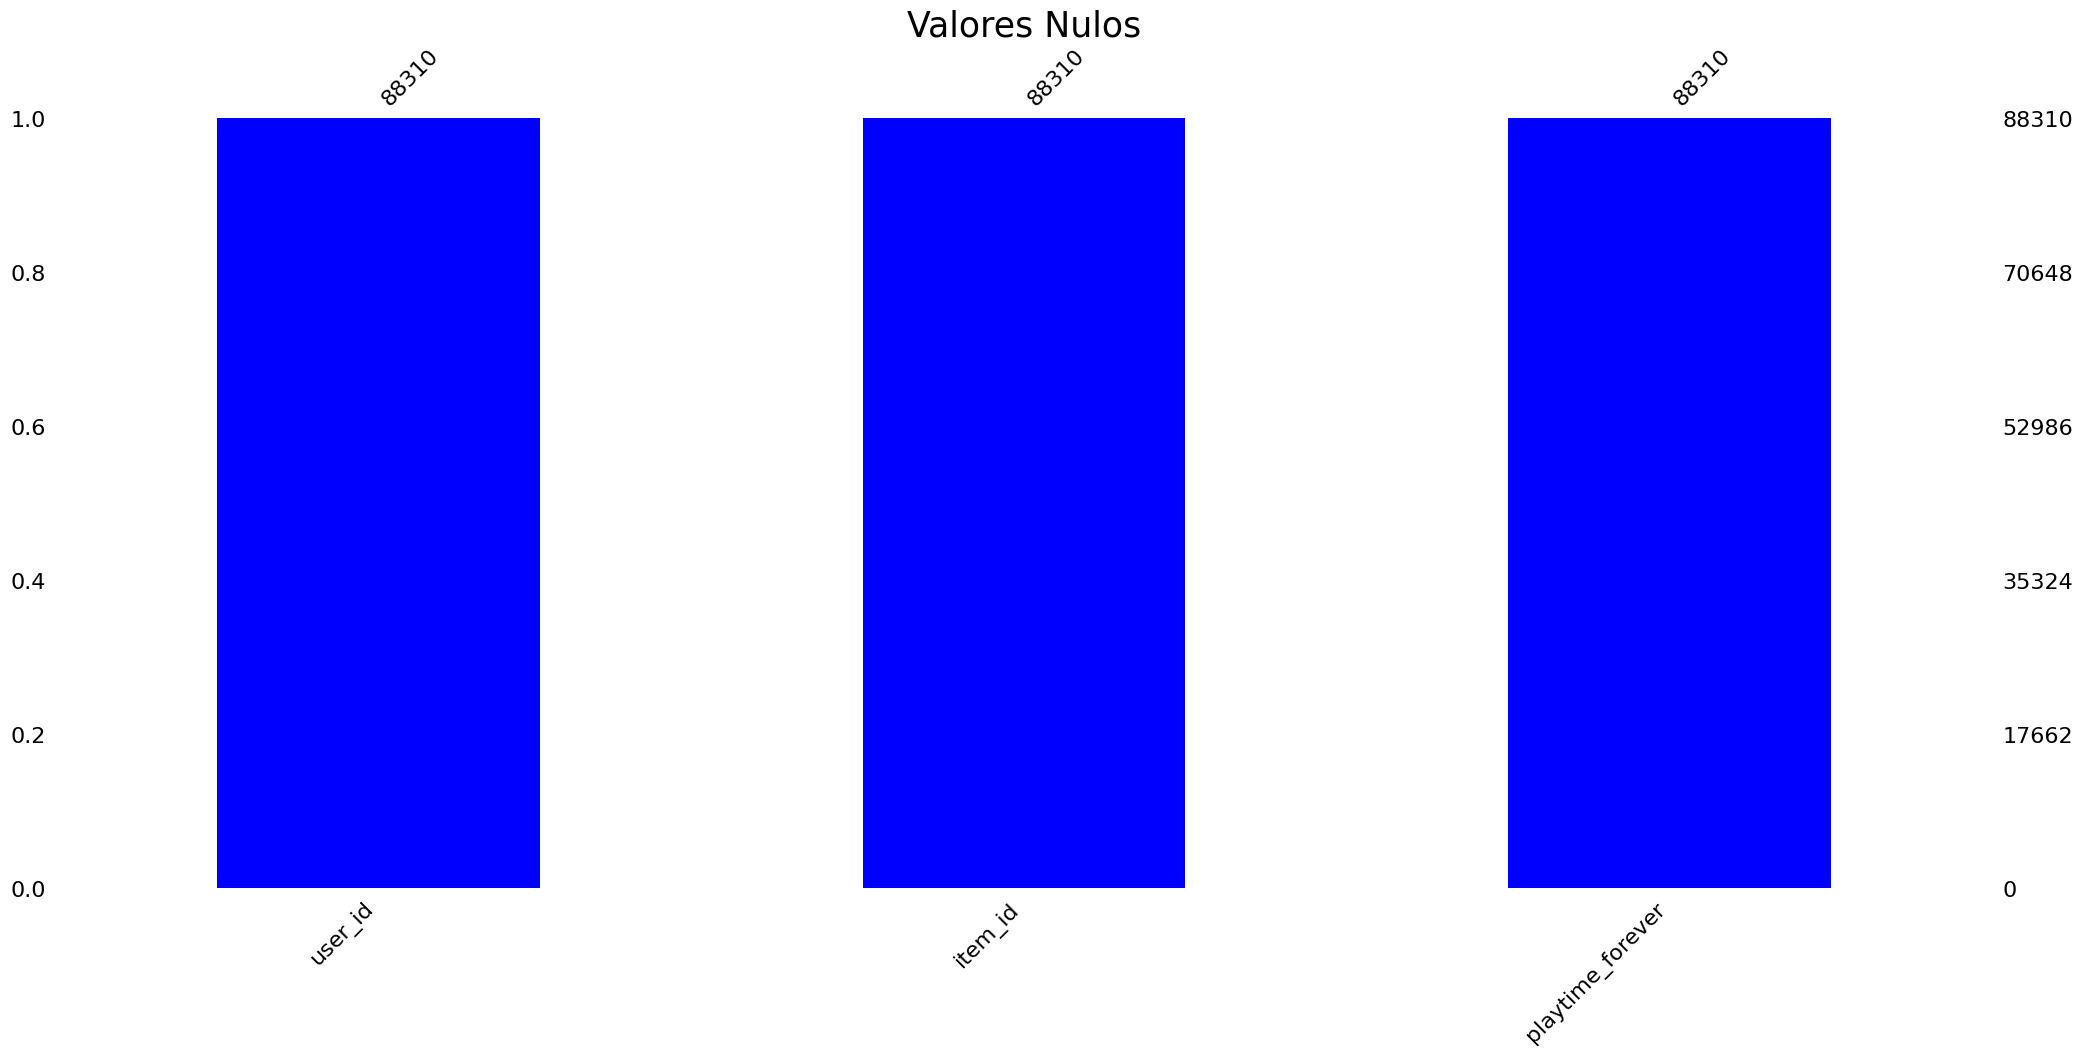

In [76]:
# Uso missigno para analizar datos perdidos
import missingno
#graficamos los registros válidos
missingno.bar(df_DB, color="blue")
plt.title("Valores Nulos", fontsize=25)

Con las transformaciones preliminares no subsisten valores faltantes.

### Análisis y ajustes adicionales

In [77]:
df_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           88310 non-null  object
 1   item_id           88310 non-null  int64 
 2   playtime_forever  88310 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.0+ MB


Se deben modificar los tipos de datos de las columnas user_id a tipo texto, y las de item_id y playtime_forever a valores enteros.

In [78]:
df_DB["user_id"] = df_DB["user_id"].astype("str")
df_DB["item_id"] = df_DB["item_id"].astype("int")
df_DB["playtime_forever"] = df_DB["playtime_forever"].astype("int")

### Análisis de distribución de los datos

In [79]:
# Distribución de la registros por recomend (True,False)
recomendado = df_DB["playtime_forever"].value_counts()
porcentaje = 100*df_DB["playtime_forever"].value_counts(normalize=True)
pd.DataFrame({"Horas Jugadas":recomendado, "Porcentaje":porcentaje.round(2)})

,Horas Jugadas,Porcentaje
playtime_forever,,
0,28414,32.18
1,1861,2.11
2,642,0.73
3,543,0.61
4,505,0.57
...,...,...
7034,1,0.00
4746,1,0.00
12158,1,0.00


### Grabación del dataframe con el archivo para la API en formato csv

In [80]:
df_DB.to_csv("../data/aui_api.csv", index=False)